# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_theme()

# Data Fetching

In [3]:
import urllib.request
import tarfile
from pathlib import Path

tarball_path = Path("../db/housing/housing.tgz")
if not tarball_path.is_file():
    Path("../db/housing").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as tarball:
        tarball.extractall(path="../db")

In [4]:
data = pd.read_csv("../db/housing/housing.csv")

# Data Exploration

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


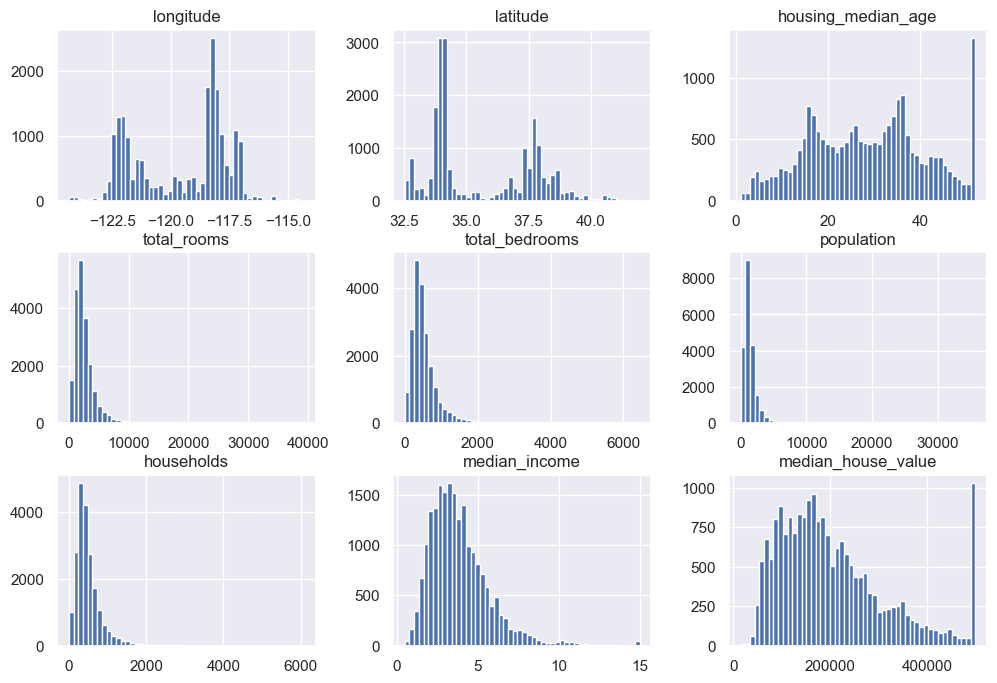

In [9]:
data.hist(bins=50, figsize=(12, 8))
plt.show()

# Data Preparation

## Train Test Split

### Create categories for continuous variable

In [10]:
data["income_cat"] = pd.cut(data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

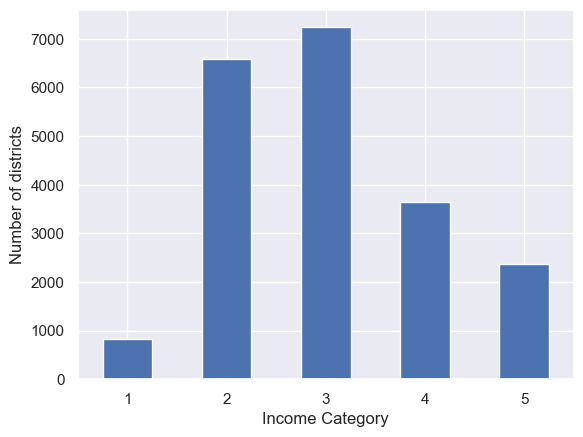

In [11]:
data["income_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

### Stratified split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(data, data["income_cat"]):
    strat_train_set_n = data.iloc[train_index]
    strat_test_set_n = data.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
strat_splits

[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  13096    -122.42     37.80                52.0       3321.0          1115.0   
  14973    -118.38     34.14                40.0       1965.0           354.0   
  3785     -121.98     38.36                33.0       1083.0           217.0   
  14689    -117.11     33.75                17.0       4174.0           851.0   
  20507    -118.15     33.77                36.0       4366.0          1211.0   
  ...          ...       ...                 ...          ...             ...   
  14207    -118.40     33.86                41.0       2237.0           597.0   
  13105    -119.31     36.32                23.0       2945.0           592.0   
  19301    -117.06     32.59                13.0       3920.0           775.0   
  19121    -118.40     34.06                37.0       3781.0           873.0   
  19888    -122.41     37.66                44.0        431.0           195.0   
  
         population  hous

In [13]:
strat_train_set, strat_test_set = strat_splits[0]

In [14]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


In [15]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


### Random split

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, random_state=42, test_size=0.2)

### Split comparison

In [17]:
test_set["income_cat"].value_counts(normalize=True)

3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: income_cat, dtype: float64

In [18]:
strat_test_set["income_cat"].value_counts(normalize=True)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

### Remove created categories

In [19]:
strat_train_set.drop(columns="income_cat", inplace=True)
strat_test_set.drop(columns="income_cat", inplace=True)

C:\Users\marce\AppData\Local\Temp\ipykernel_48272\3613106356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop(columns="income_cat", inplace=True)
C:\Users\marce\AppData\Local\Temp\ipykernel_48272\3613106356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop(columns="income_cat", inplace=True)


# Data Insights

*Can copy just a small sample of the training set, if the set is too large to work with*

In [20]:
exploration_set = strat_train_set.copy()

## Map (Population and Median House Value)

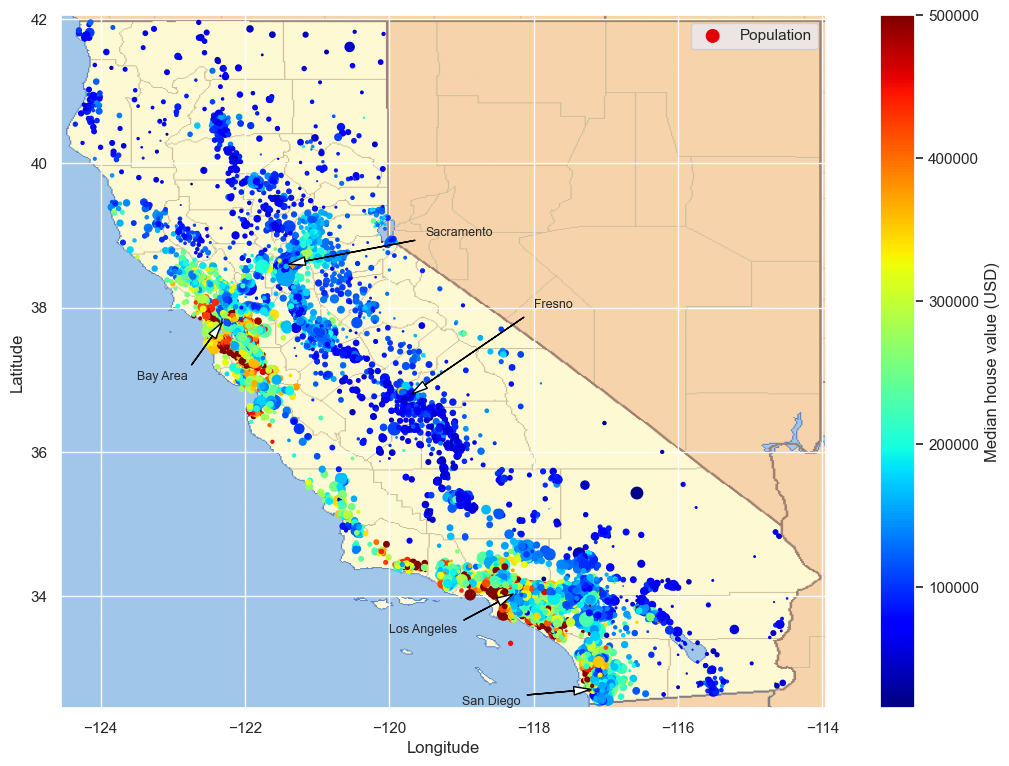

In [21]:
# Download the California image
filename = Path("../images/california.png")
if not filename.is_file():
    Path("../images").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/handson-ml3/raw/main/images/end_to_end_project/california.png"
    print("Downloading", filename)
    urllib.request.urlretrieve(url, filename)

exploration_set_renamed = exploration_set.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (USD)"})

exploration_set_renamed.plot(
    kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    s=exploration_set_renamed["Population"] / 100, 
    label="Population", 
    c="Median house value (USD)", 
    cmap="jet", 
    figsize=(14, 9))

position_text = {
    "Los Angeles": ((-118.2437, 34.0522), (-120, 33.5)),
    "San Diego": ((-117.1611, 32.7157), (-119, 32.5)),
    "Sacramento": ((-121.4944, 38.5816), (-119.5, 39)),
    "Fresno": ((-119.7871, 36.7378), (-118, 38)),
    "Bay Area": ((-122.2913, 37.8272), (-123.5, 37))
}
for city, pos in position_text.items():
    plt.annotate(city, xy=pos[0], fontsize=9, xytext=pos[1], arrowprops=dict(facecolor="white", edgecolor="black", width=0.001, shrink=0.05, headwidth=6))

california_img = plt.imread(filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)

plt.imshow(california_img, extent=axis)

plt.show()

## Correlations

### Correlation Matrix

In [22]:
corr_matrix = exploration_set.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

### Pair Plot using pandas.plotting.scatter_matrix

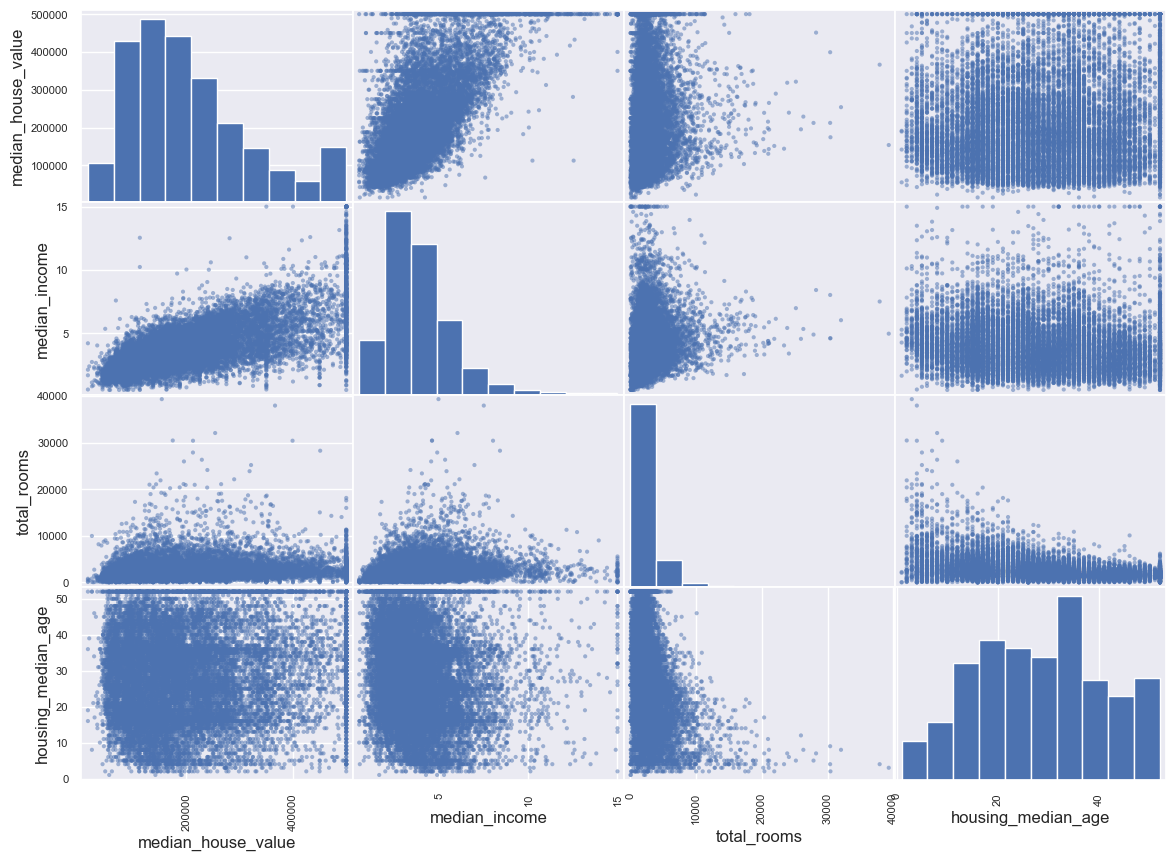

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(exploration_set[attributes], figsize=(14, 10))
plt.show()

### Pair Plot using Seaborn

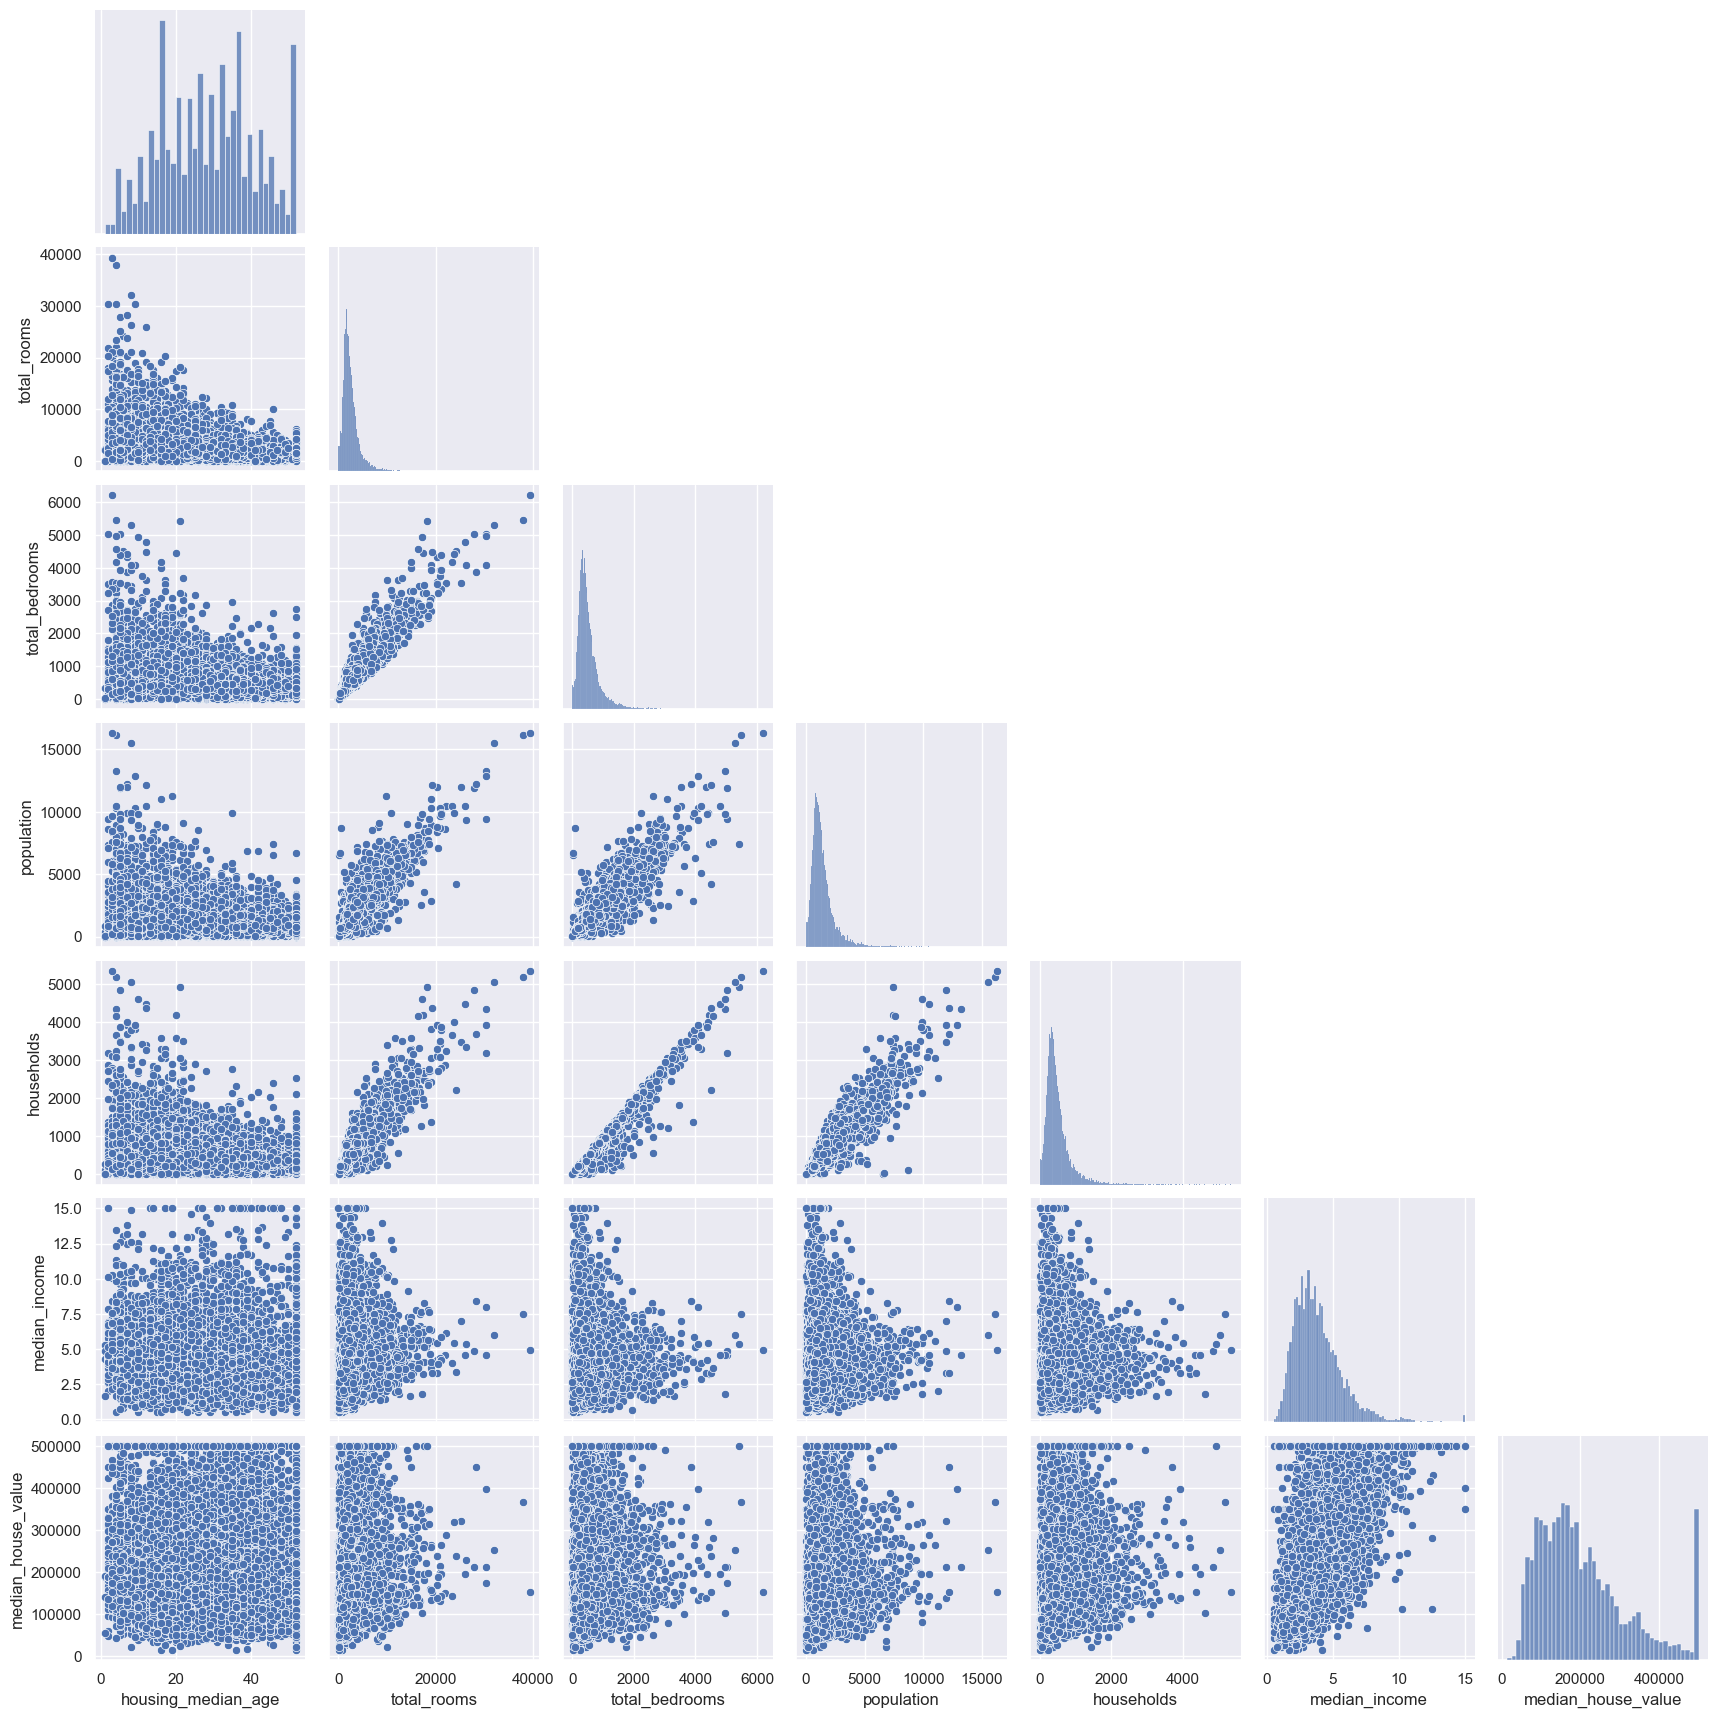

In [25]:
sns.pairplot(exploration_set.drop(columns=["latitude", "longitude"]), corner=True)
plt.show()

### Focus on one promising pair

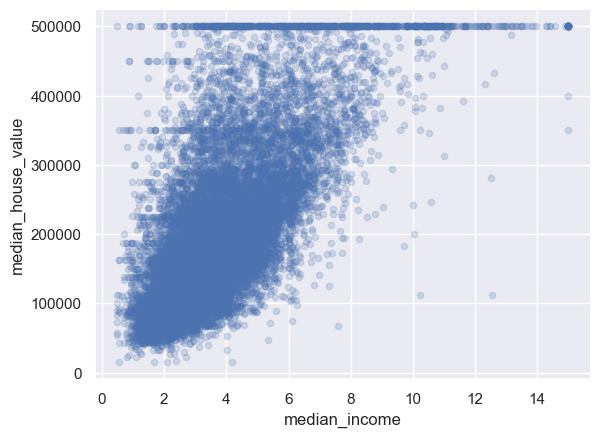

In [26]:
exploration_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.show()

### Attributes Combination

In [27]:
exploration_set["rooms_per_house"] = exploration_set["total_rooms"] / exploration_set["households"]
exploration_set["bedrooms_ratio"] = exploration_set["total_bedrooms"] / exploration_set["households"]
exploration_set["people_per_house"] = exploration_set["population"] / exploration_set["households"]

In [28]:
corr_matrix = exploration_set.corr()
corr_matrix

C:\Users\marce\AppData\Local\Temp\ipykernel_48272\2207450777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = exploration_set.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859,-0.027899,0.008847,0.024587
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584,0.108037,0.075215,-0.026457
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175,-0.153900,-0.079241,0.012771
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455,0.128631,0.030962,-0.037702
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635,0.001569,0.045857,-0.045017
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153,-0.076603,-0.067239,0.085204
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426,-0.082242,-0.054277,-0.042452
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380,0.314316,-0.058433,-0.006662
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000,0.143663,-0.045545,-0.038224
rooms_per_house,-0.027899,0.108037,-0.153900,0.128631,0.001569,-0.076603,-0.082242,0.314316,0.143663,1.000000,0.860400,0.003868


In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
bedrooms_ratio       -0.045545
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

# Data Cleaning

In [30]:
housing = strat_train_set.drop(columns="median_house_value")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [31]:
housing_labels = strat_train_set["median_house_value"].copy()
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

## total_bedroom has some missing values

### Option 1 (Remove districts with empty attribute)

In [32]:
# housing.dropna(subset=["total_bedroom"], inplace=True)

### Option 2 (Remove the attribute)

In [33]:
# housing.drop(columns="total_bedrooms")

### Option 3 (Imputation)

In [34]:
# housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

In [35]:
from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
_ = imputer.fit(housing_num)

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [37]:
X = imputer.transform(housing_num)

## ocean_proximity is a categorical attribute

In [38]:
housing_cat = strat_train_set[["ocean_proximity"]]
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


### OrdinalEncoder

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### OneHotEncoder

In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=True)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

C:\Users\marce\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Scaling and Transformation

### Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

### Standardization

In [44]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_num_std_scaled = standard_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

### house_median_age has a multimodal distribution (RBF Kernel)

In [45]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_16 = rbf_kernel(housing_num[["housing_median_age"]], [[16]], gamma=0.1)
age_simil_35 = rbf_kernel(housing_num[["housing_median_age"]], [[35]], gamma=0.1)

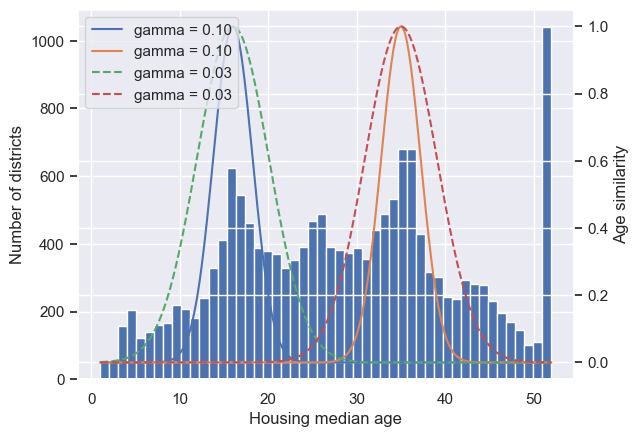

In [46]:
ages = np.linspace(housing_num["housing_median_age"].min(),
                   housing_num["housing_median_age"].max(),
                   500).reshape(-1, 1)

rbf1 = rbf_kernel(ages, [[16], [35]], gamma=0.1)
rbf2 = rbf_kernel(ages, [[16], [35]], gamma=0.03)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing_num["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
ax2.plot(ages, rbf1, label="gamma = 0.10")
ax2.plot(ages, rbf2, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y')
ax2.set_ylabel("Age similarity")

plt.legend(loc="upper left")
plt.show()

### Composed Regressors example

#### Without composition

In [47]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing_num[["median_income"]], scaled_labels)
some_new_data = housing_num[["median_income"]].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
print(scaled_predictions)
print(predictions)

[[-0.64466228]
 [ 0.80674175]
 [-0.52302364]
 [-0.5853166 ]
 [-0.12415952]]
[[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


#### With composition

In [48]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing_num[["median_income"]], housing_labels)
some_new_data = housing_num[["median_income"]].iloc[:5] # pretend this is new data

model.predict(some_new_data)

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

### Custom Transformers examples

In [49]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing_num[["population"]])
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [50]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing_num[["housing_median_age"]])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [51]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing_num[["latitude", "longitude"]])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [52]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [54]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state, n_init="auto")
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [55]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing_num[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
similarities[:5].round(2)

array([[0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.15],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.11, 0.  , 0.  , 0.64, 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.27, 0.  , 0.62],
       [0.  , 0.21, 0.  , 0.52, 0.  , 0.  , 0.  , 0.  , 0.64, 0.  ],
       [0.  , 0.89, 0.  , 0.14, 0.  , 0.03, 0.  , 0.  , 0.86, 0.  ]])

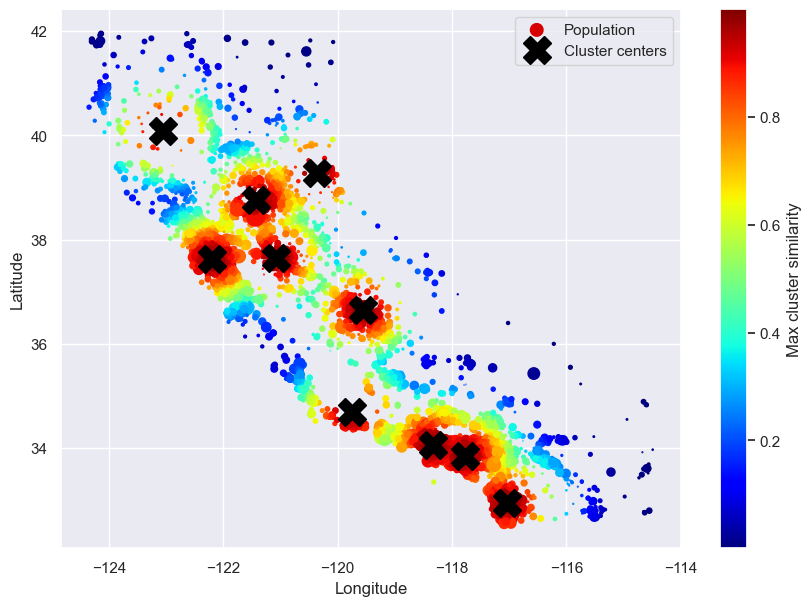

In [56]:
housing_renamed = housing_num.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### Transformation Pipelines

#### With names

In [57]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

#### Without names

In [58]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

#### Usage

In [59]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [60]:
housing_num_prepared_df = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)
housing_num_prepared_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


#### Column Transformer

In [61]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [62]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [63]:
housing_prepared = preprocessing.fit_transform(housing)

In [64]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

## Final pipeline

In [65]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

In [66]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [67]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Modelling

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025F3F8F1290>)])),
                ('linearregression', LinearRegression())])

In [69]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([249500., 372400., 130900.,  93600., 327600.])

In [70]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [71]:
from sklearn.metrics import mean_squared_error

mean_squared_error(housing_labels, housing_predictions, squared=False)

68835.27333997977

## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025F3F8F1290>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [73]:
mean_squared_error(housing_labels, housing_predictions, squared=False)

68835.27333997977

### Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [75]:
with pd.option_context('display.float_format', '{:0.6f}'.format):
    print(pd.Series(tree_rmses).describe())

count      10.000000
mean    66354.333214
std      1961.249494
min     62111.629941
25%     65389.895312
50%     66883.212924
75%     67630.601638
max     68595.829637
dtype: float64


## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

# tree_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
# tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
# with pd.option_context('display.float_format', '{:0.6f}'.format):
#     print(pd.Series(tree_rmses).describe())

## SVM

### SVR

In [77]:
from sklearn.svm import SVR

# # C=1000000, gamma=0.1, kernel="rbf" found after GridSearch
# tree_reg = make_pipeline(preprocessing, SVR(C=1000000, gamma=0.1, kernel="rbf"))
# tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
# with pd.option_context('display.float_format', '{:0.6f}'.format):
#     print(pd.Series(tree_rmses).describe())

### Linear SVR

In [78]:
from sklearn.svm import LinearSVR

tree_reg = make_pipeline(preprocessing, LinearSVR())
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
with pd.option_context('display.float_format', '{:0.6f}'.format):
    print(pd.Series(tree_rmses).describe())

count       10.000000
mean    214826.502249
std       2381.547388
min     211384.692008
25%     213188.025959
50%     214565.113755
75%     216474.837194
max     218659.490913
dtype: float64


### NuSVR

In [79]:
# from sklearn.svm import NuSVR

# tree_reg = make_pipeline(preprocessing, NuSVR())
# tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
# with pd.option_context('display.float_format', '{:0.6f}'.format):
#     print(pd.Series(tree_rmses).describe())

## KNN

In [80]:
from sklearn.neighbors import KNeighborsRegressor

tree_reg = make_pipeline(preprocessing, KNeighborsRegressor())
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
with pd.option_context('display.float_format', '{:0.6f}'.format):
    print(pd.Series(tree_rmses).describe())

count      10.000000
mean    60319.653899
std      1717.059043
min     57596.319429
25%     59261.114318
50%     60764.516070
75%     61151.764258
max     62679.638379
dtype: float64


## MLP

In [81]:
# from sklearn.neural_network import MLPRegressor

# tree_reg = make_pipeline(preprocessing, MLPRegressor(random_state=42))
# tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
# with pd.option_context('display.float_format', '{:0.6f}'.format):
#     print(pd.Series(tree_rmses).describe())

## Fine-Tuning

### Grid Search

In [82]:
# from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])
# param_grid = [
#     {'preprocessing__geo__n_clusters': [5, 8, 10], 'random_forest__max_features': [4, 6, 8]},
#     {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, 10]},
# ]
# grid_search = GridSearchCV(full_pipeline, param_grid=param_grid, scoring="neg_root_mean_squared_error", cv=3)
# grid_search.fit(housing, housing_labels)
# grid_search.best_params_

In [83]:
# cv_res = pd.DataFrame(grid_search.cv_results_)
# cv_res["n_clusters"] = cv_res["param_preprocessing__geo__n_clusters"]
# cv_res["max_features"] = cv_res["param_random_forest__max_features"]
# cv_res["split0"] = -cv_res["split0_test_score"]
# cv_res["split1"] = -cv_res["split1_test_score"]
# cv_res["split2"] = -cv_res["split2_test_score"]
# cv_res["mean_test_rmse"] = -cv_res["mean_test_score"]
# cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res.drop(columns=["mean_fit_time", "std_fit_time", "std_score_time", "mean_score_time", "params", "std_test_score", "rank_test_score", "param_random_forest__max_features", "param_preprocessing__geo__n_clusters", "split0_test_score", "split1_test_score", "split2_test_score", "mean_test_score"], inplace=True)
# cv_res

In [84]:
# sns.scatterplot(cv_res, x="n_clusters", y="mean_test_rmse", hue="max_features")
# plt.show()

### Randomized Search

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=30, high=100), 'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, scoring="neg_root_mean_squared_error", cv=3, n_iter=10)
rnd_search.fit(housing, housing_labels)
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 69, 'random_forest__max_features': 13}

In [86]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res["n_clusters"] = cv_res["param_preprocessing__geo__n_clusters"]
cv_res["max_features"] = cv_res["param_random_forest__max_features"]
cv_res["split0"] = -cv_res["split0_test_score"]
cv_res["split1"] = -cv_res["split1_test_score"]
cv_res["split2"] = -cv_res["split2_test_score"]
cv_res["mean_test_rmse"] = -cv_res["mean_test_score"]
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.drop(columns=["mean_fit_time", "std_fit_time", "std_score_time", "mean_score_time", "params", "std_test_score", "rank_test_score", "param_random_forest__max_features", "param_preprocessing__geo__n_clusters", "split0_test_score", "split1_test_score", "split2_test_score", "mean_test_score"], inplace=True)
cv_res

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
2,69,13,40928.411307,42223.754006,42758.601950,41970.255754
5,64,8,41038.106302,42297.958597,42826.953320,42054.339407
4,70,16,41347.243804,42135.796086,42755.118258,42079.386049
9,51,15,41536.864196,42341.950497,42811.658724,42230.157806
7,94,8,41205.256416,42724.669830,43132.049962,42353.992069
0,58,19,41651.322466,42597.337056,42931.682928,42393.447483
6,59,18,41722.323433,42497.996687,43035.424591,42418.581570
3,61,19,41981.185868,42319.506520,43110.275604,42470.322664
1,48,5,41566.078215,42683.903494,43532.949536,42594.310415
8,62,3,43101.503271,44542.357461,45472.281598,44372.047444


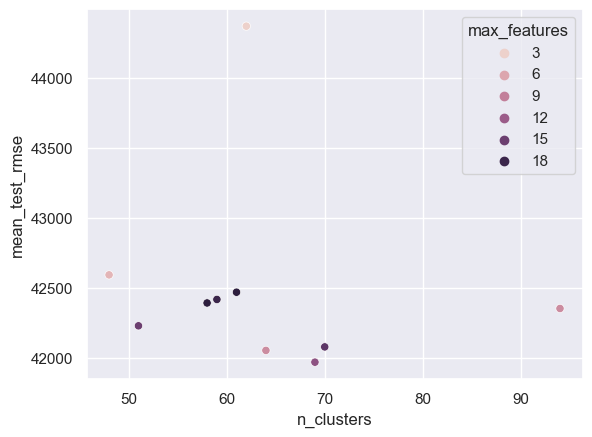

In [87]:
sns.scatterplot(cv_res, x="n_clusters", y="mean_test_rmse", hue="max_features")
plt.show()

### Best Model Analysis

In [88]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.  , 0.01, 0.02,
       0.01, 0.  , 0.01, 0.02, 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.01,
       0.02, 0.01, 0.02, 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.02, 0.01,
       0.01, 0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01,
       0.  , 0.07, 0.  , 0.  , 0.  , 0.01])

In [89]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.19240637879644004, 'log__median_income'),
 (0.07477604706720721, 'cat__ocean_proximity_INLAND'),
 (0.0619593006288143, 'bedrooms__ratio'),
 (0.05256885029225668, 'rooms_per_house__ratio'),
 (0.04721216810119559, 'people_per_house__ratio'),
 (0.021674253590347067, 'geo__Cluster 49 similarity'),
 (0.01755357955547048, 'geo__Cluster 2 similarity'),
 (0.01747934024432035, 'geo__Cluster 6 similarity'),
 (0.015287787296771063, 'geo__Cluster 35 similarity'),
 (0.015275905626609262, 'geo__Cluster 56 similarity'),
 (0.015240020847202728, 'geo__Cluster 61 similarity'),
 (0.015030547912697142, 'geo__Cluster 47 similarity'),
 (0.014899610234317935, 'geo__Cluster 28 similarity'),
 (0.014897683419218873, 'geo__Cluster 9 similarity'),
 (0.013954024898160534, 'geo__Cluster 15 similarity'),
 (0.01356689601282236, 'geo__Cluster 14 similarity'),
 (0.01327390647950262, 'geo__Cluster 62 similarity'),
 (0.012288227513085134, 'geo__Cluster 67 similarity'),
 (0.011303739047074162, 'geo__Cluster 26 similar

### Test Set Score

In [90]:
X_test = strat_test_set.drop(columns="median_house_value")
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

41409.75972269893

### Confidence Interval

In [91]:
from scipy import stats

stats.sem

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors), loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39245.79333407, 43466.12596221])

### SelectFromModel


In [96]:
from sklearn.feature_selection import SelectFromModel

preprocessing.set_params(geo__n_clusters=69)

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("select_From_model", SelectFromModel(estimator=RandomForestRegressor(random_state=42, max_features=13), threshold=0.005)),
    ("random_forest", RandomForestRegressor(random_state=42, max_features=13))
])

cross_val_score(full_pipeline, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=3)

array([-47981.62373039, -47679.95248302, -47798.44645776])

In [97]:
full_pipeline.fit(housing, housing_labels)

0.8357093286064949

In [98]:
final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

41409.75972269893

### KNN transformer

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.neighbors import KNeighborsRegressor

class KNNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_neighbors=5, weights="uniform"):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X, y=None):
        X = check_array(X)  # checks that X is an array with finite float values
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        self.knn_ = KNeighborsRegressor(n_neighbors=self.n_neighbors, weights=self.weights)
        self.knn_.fit(X, y)
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        
        predictions = self.knn_.predict(X)
        assert self.n_features_in_ == X.shape[1]
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions
    
    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.knn_, "n_outputs_", 1)
        estimator_class_name = self.knn_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

In [128]:
knn_transformer = KNNTransformer(n_neighbors=3, weights="distance")
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[486100.66666667],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

In [129]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

In [130]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns) for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [131]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=1000000, gamma=0.1, kernel="rbf")),
])

In [132]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     102909.658043
std        2871.260512
min      100001.179511
25%      101493.390131
50%      102985.600751
75%      104363.897309
max      105742.193867
dtype: float64

In [133]:
from scipy.stats import loguniform, expon

param_distribs = {
    "preprocessing__geo__n_neighbors": range(1, 30),
    "preprocessing__geo__weights": ["distance", "uniform"],
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

72292.91084705603

## Save model

In [94]:
import joblib

path = Path("my_california_housing_model.pkl")
if not path.is_file():
    joblib.dump(final_model, path)